In [30]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
#Read the csv file
df=pd.read_csv('/content/EDA_health_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,charges,chidren,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,1,27.900,0.0,1,16884.92400,0.0,0,0,0,1
1,18.0,0,33.770,1.0,0,1725.55230,1.0,0,0,1,0
2,28.0,0,33.000,3.0,0,4449.46200,3.0,0,0,1,0
3,33.0,0,22.705,0.0,0,21984.47061,0.0,0,1,0,0
4,32.0,0,28.880,0.0,0,3866.85520,0.0,0,1,0,0


In [59]:
#Defining the dependent and independent variables
x = df.drop(['charges','sex','chidren'], axis=1) #Dropping the sex column as well as it as almost no correlation with the charges column
y = df['charges']

In [60]:
x

,age,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1,0,0,0,1
1,18.0,33.770,1.0,0,0,0,1,0
2,28.0,33.000,3.0,0,0,0,1,0
3,33.0,22.705,0.0,0,0,1,0,0
4,32.0,28.880,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1267,50.0,30.970,3.0,0,0,1,0,0
1268,18.0,31.920,0.0,0,1,0,0,0
1269,18.0,36.850,0.0,0,0,0,1,0
1270,21.0,25.800,0.0,0,0,0,0,1


In [61]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [62]:
#Standard scaler transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [63]:
#Training the model for linear regression, SVR,ridge, lasso and elasticnet
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_y_pred = lr_model.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(x_train, y_train)
svr_y_pred = svr_model.predict(x_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
ridge_y_pred = ridge_model.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
lasso_y_pred = lasso_model.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

# Elastic Net Regression
elastic_model = ElasticNet()
elastic_model.fit(x_train, y_train)
elastic_y_pred = elastic_model.predict(x_test)
elastic_mse = mean_squared_error(y_test, elastic_y_pred)
elastic_r2 = r2_score(y_test, elastic_y_pred)

print("Linear Regression - MSE:", lr_mse, "R-squared:", lr_r2)
print("SVR - MSE:", svr_mse, "R-squared:", svr_r2)
print("Ridge Regression - MSE:", ridge_mse, "R-squared:", ridge_r2)
print("Lasso Regression - MSE:", lasso_mse, "R-squared:", lasso_r2)
print("Elastic Net Regression - MSE:", elastic_mse, "R-squared:", elastic_r2)


Linear Regression - MSE: 42529218.76073666 R-squared: 0.6789162755740379
SVR - MSE: 145480856.07593608 R-squared: -0.09833983465182783
Ridge Regression - MSE: 42417378.90796468 R-squared: 0.6797606352287333
Lasso Regression - MSE: 42427387.698538266 R-squared: 0.6796850716550771
Elastic Net Regression - MSE: 50189478.37517354 R-squared: 0.6210834547806334


In [64]:
#finding the best model
results = {
    "Linear Regression": {"MSE": lr_mse, "R-squared": lr_r2},
    "SVR": {"MSE": svr_mse, "R-squared": svr_r2},
    "Ridge Regression": {"MSE": ridge_mse, "R-squared": ridge_r2},
    "Lasso Regression": {"MSE": lasso_mse, "R-squared": lasso_r2},
    "Elastic Net Regression": {"MSE": elastic_mse, "R-squared": elastic_r2},
}

best_model = min(results, key=lambda k: results[k]["MSE"])
print("Best Model based on lowest MSE:", best_model)

best_model_r2 = max(results, key=lambda k: results[k]["R-squared"])
print("Best Model based on highest R-squared:", best_model_r2)



Best Model based on lowest MSE: Ridge Regression
Best Model based on highest R-squared: Ridge Regression


In [65]:
#Applying the best model in test data
best_model = Ridge()
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

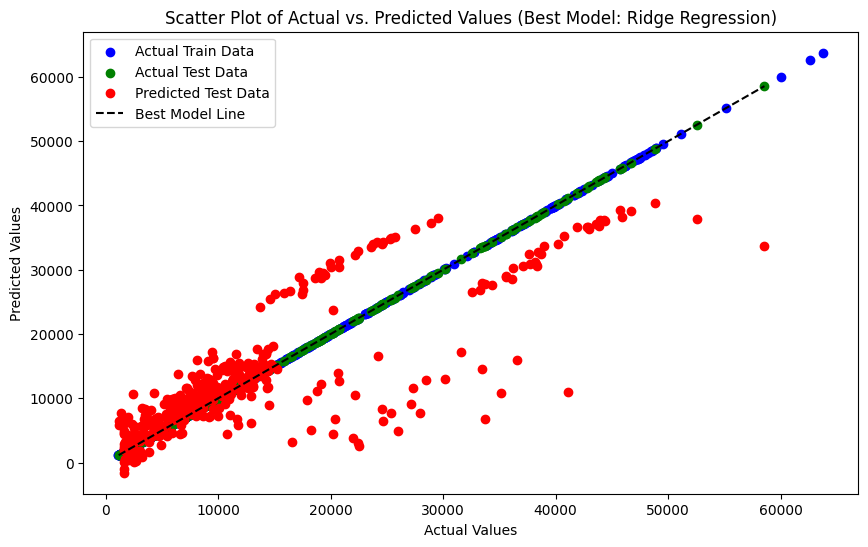

In [66]:
#Visualize in a scatter plot the y_pred & y_train & y_test values with best_model line in the plot in different colours

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train, color='blue', label='Actual Train Data')
plt.scatter(y_test, y_test, color='green', label='Actual Test Data')
plt.scatter(y_test, y_pred, color='red', label='Predicted Test Data')

# Plot the best model line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Best Model Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values (Best Model: Ridge Regression)')
plt.legend()
plt.show()


In [67]:
#Read the validation dataset
df_val = pd.read_csv('/content/validation_dataset.csv')
df_val.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [68]:
df_val.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0


In [69]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       50 non-null     float64
 1   sex       50 non-null     object 
 2   bmi       50 non-null     float64
 3   children  50 non-null     float64
 4   smoker    50 non-null     object 
 5   region    50 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.5+ KB


In [70]:
df_val['region'].value_counts()

,count
region,
northwest,16
southeast,14
northeast,11
southwest,9


In [71]:
#Data preprocessing for the validation dataset
def preprocess_df(df):
  df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
  for column in df_new.columns:
   if df_new[column].dtype == bool:
    df_new[column] = df_new[column].astype(int)
  df_new['children'] = df['children'].abs()
  df_new['sex'] = df['sex'].map({'male':0,'female':1})
  df_new['smoker'] = df['smoker'].map({'yes':1,'no':0})
  df['age'] = df['age'].abs()
  return df_new


In [72]:
input_data = preprocess_df(df_val)

In [73]:
input_data = input_data.drop(['sex'], axis=1)

In [74]:
input_data.head()

,age,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,18.0,24.090000,1.0,0,0,0,1,0
1,39.0,26.410000,0.0,1,1,0,0,0
2,27.0,29.150000,0.0,1,0,0,1,0
3,71.0,65.502135,13.0,1,0,0,1,0
4,28.0,38.060000,0.0,0,0,0,1,0


In [75]:
input_df = scaler.transform(input_data)

In [76]:
#Predicting the charges of the validation dataset
y_prediction = best_model.predict(input_df)

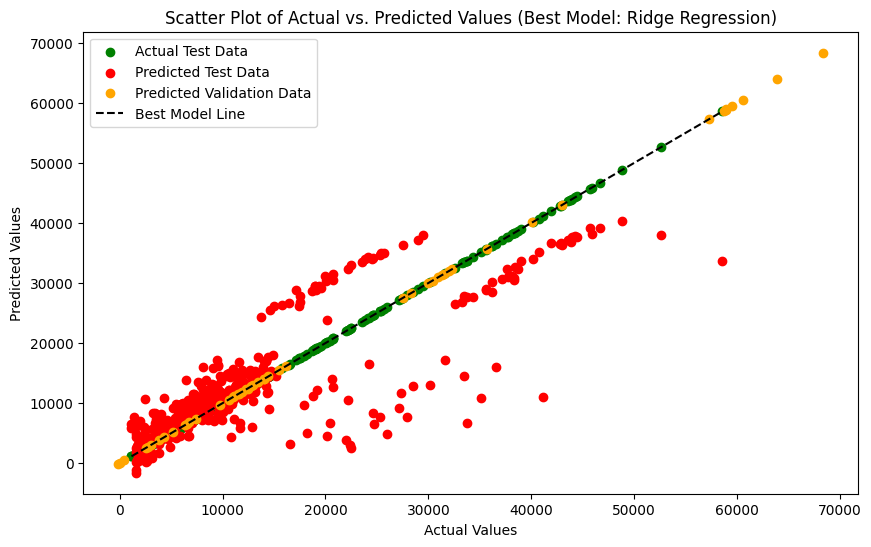

In [80]:
#Visualize in a scatter plot the y_prediction & y_train & y_test & y_pred values with best_model line in the plot in different colours

plt.figure(figsize=(10, 6))
#plt.scatter(y_train, y_train, color='blue', label='Actual Train Data')
plt.scatter(y_test, y_test, color='green', label='Actual Test Data')
plt.scatter(y_test, y_pred, color='red', label='Predicted Test Data')
plt.scatter(y_prediction, y_prediction, color='orange', label='Predicted Validation Data')

# Plot the best model line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Best Model Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values (Best Model: Ridge Regression)')
plt.legend()
plt.show()
